In [3]:
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open('data/demand_and_weather.pickle', 'rb') as f:
    data_weather = pickle.load(f)

In [109]:
data_weather

,date_hour,start_station_id,id_x,installation_date,start_station_name,demand,month,weekday,hour,date,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,temp_cat
0,2013-08-29 09:00:00,64,64,2013-08-22,2nd at South Park,1.0,8,3,9,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
1,2013-08-29 10:00:00,64,64,2013-08-22,0,0.0,8,3,10,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
2,2013-08-29 11:00:00,64,64,2013-08-22,0,0.0,8,3,11,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
3,2013-08-29 12:00:00,64,64,2013-08-22,2nd at South Park,1.0,8,3,12,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
4,2013-08-29 13:00:00,64,64,2013-08-22,2nd at South Park,3.0,8,3,13,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
5,2013-08-29 14:00:00,64,64,2013-08-22,2nd at South Park,3.0,8,3,14,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
6,2013-08-29 15:00:00,64,64,2013-08-22,2nd at South Park,2.0,8,3,15,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
7,2013-08-29 16:00:00,64,64,2013-08-22,0,0.0,8,3,16,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
8,2013-08-29 17:00:00,64,64,2013-08-22,0,0.0,8,3,17,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"
9,2013-08-29 18:00:00,64,64,2013-08-22,0,0.0,8,3,18,2013-08-29,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,"(65, 70]"


In [7]:
dem = data_weather['demand']
mean_temp = data_weather['mean_temperature_f']

In [7]:
data_weather['temp_cat'] = pd.cut(data_weather['mean_temperature_f'], bins = [30,35,40,45,50,55,60,65,70,75,80,90] )

In [8]:
data_weather['temp_cat']

0          (65, 70]
1          (65, 70]
2          (65, 70]
3          (65, 70]
4          (65, 70]
             ...   
1208869    (70, 75]
1208870    (70, 75]
1208871    (70, 75]
1208872    (70, 75]
1208873    (70, 75]
Name: temp_cat, Length: 1208874, dtype: category
Categories (11, interval[int64]): [(30, 35] < (35, 40] < (40, 45] < (45, 50] ... (65, 70] < (70, 75] < (75, 80] < (80, 90]]

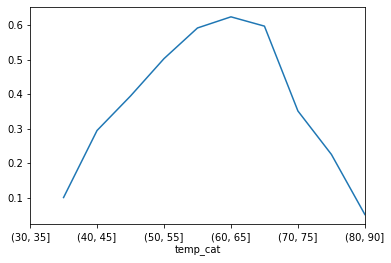

In [108]:
data_weather.groupby('temp_cat')['demand'].mean().plot()

### Plot demand rates for every minute (for a single bike station?) vs mean temperature 
#### At very low or high temperatures the demand is understandably lower

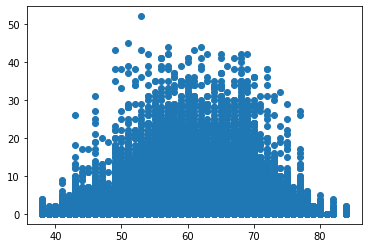

In [8]:
plt.scatter(mean_temp[0:1000000],dem[0:1000000])
plt.show()

### Plotting a distribution over the temperature data 
#### Clearly lower and higher temperatures are less common so there is an imbalance in data points for these temperatures
#### This means there can be bias if we simply use mean temperature in predicting demand 

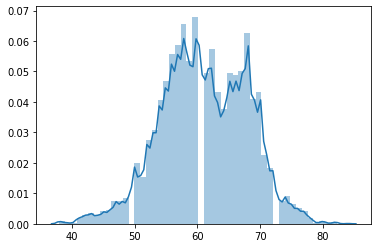

In [9]:
mean_temp = [t for t in mean_temp if str(t)!='nan']
sns.distplot(mean_temp)

#### Let us investigate if presence of rain affects the demand adversely. Plotting distribution density (in blue) of demand for minutes with precipitation and distribution density (in orange) when there is no precipitation

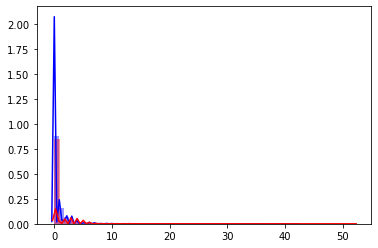

In [69]:
mask_rain = data_weather['precipitation_inches']!='0'
rainy_days = data_weather.loc[mask_rain]
rainy_demand = np.array(rainy_days['demand'])
sns.distplot(rainy_demand,color='blue')

mask_dry = data_weather['precipitation_inches']=='0'
dry_days = data_weather.loc[mask_dry]

dry_demand = np.array(dry_days['demand'])
sns.distplot(dry_demand,color='red')

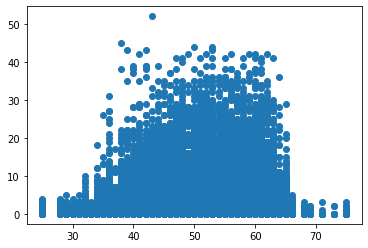

In [67]:
dem = data_weather['demand']
min_temp = data_weather['min_temperature_f']

plt.scatter(min_temp[0:1000000],dem[0:1000000])
plt.show()

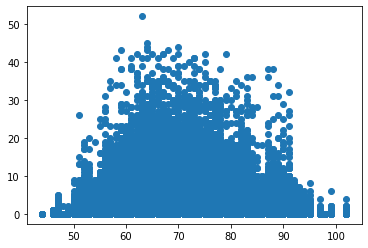

In [68]:
dem = data_weather['demand']
max_temp = data_weather['max_temperature_f']

plt.scatter(max_temp[0:1000000],dem[0:1000000])
plt.show()

In [1]:
prec= data_weather['precipitation_inches']
demand = data_weather['demand']
mean_t = data_weather['mean_temperature_f']

# sns.heatmap()

NameError: name 'data_weather' is not defined